In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas_ta as ta

#print(os.getcwd())
#df = pd.read_csv('demo/tutorial.csv', delimiter=';')
df_1 = pd.read_csv('training/prices_round_3_day_0.csv', delimiter=';')
df_2 = pd.read_csv('training/prices_round_3_day_1.csv', delimiter=';')
df_3 = pd.read_csv('training/prices_round_3_day_2.csv', delimiter=';')

# Append DF
df = df_1.append(df_2).append(df_3)
df.reset_index(drop=True, inplace=True)

#df['median_price'] = df.apply(lambda row: np.median([i for i in [row['bid_price_1'], row['bid_price_2'], row['bid_price_3'], row['ask_price_1'], row['ask_price_2'], row['ask_price_3']] if i > 0.0]), axis=1)


df


C:\Users\yinki\AppData\Local\Temp\ipykernel_19768\3392674760.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_1.append(df_2).append(df_3)


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,2,999800,GIFT_BASKET,69537,2,69536.0,18.0,69535.0,24.0,69547,2,69548.0,18.0,69550.0,24.0,69542.0,0.0
119996,2,999900,CHOCOLATE,7749,143,NaN,NaN,NaN,NaN,7751,143,NaN,NaN,NaN,NaN,7750.0,0.0
119997,2,999900,GIFT_BASKET,69551,1,69550.0,19.0,69549.0,20.0,69561,1,69562.0,19.0,69564.0,20.0,69556.0,0.0
119998,2,999900,STRAWBERRIES,3984,240,NaN,NaN,NaN,NaN,3985,92,3986.0,148.0,NaN,NaN,3984.5,0.0


In [3]:
choc_df = df[df['product'] == 'CHOCOLATE'].reset_index(drop=True)
straw_df = df[df['product'] == 'STRAWBERRIES'].reset_index(drop=True)
roses_df = df[df['product'] == 'ROSES'].reset_index(drop=True)
basket = df[df['product'] == 'GIFT_BASKET'].reset_index(drop=True)


choc = pd.DataFrame(choc_df['mid_price'] * 4).rename(columns={'mid_price': 'choc'})
straw = pd.DataFrame(straw_df['mid_price'] * 6).rename(columns={'mid_price': 'straw'})
roses = pd.DataFrame(roses_df['mid_price']).rename(columns={'mid_price': 'roses'})
basket = pd.DataFrame(basket['mid_price']).rename(columns={'mid_price': 'basket'})


df_combined = pd.concat([choc, straw, roses, basket], axis=1)
df_combined

,choc,straw,roses,basket
0,32000.0,24000.0,15000.0,71355.0
1,32006.0,23997.0,15000.0,71349.5
2,32004.0,23997.0,15000.5,71347.0
3,32010.0,23997.0,15000.0,71350.5
4,32008.0,23997.0,14997.5,71341.5
...,...,...,...,...
29995,31002.0,23901.0,14409.5,69534.5
29996,31002.0,23901.0,14408.0,69529.5
29997,31002.0,23907.0,14411.5,69543.0
29998,31000.0,23907.0,14412.5,69542.0


Mean Squared Error: 6531.813072608242
Coefficients: [0.95879753 1.00122631 1.00959939]
Intercept: 1521.7313331703626


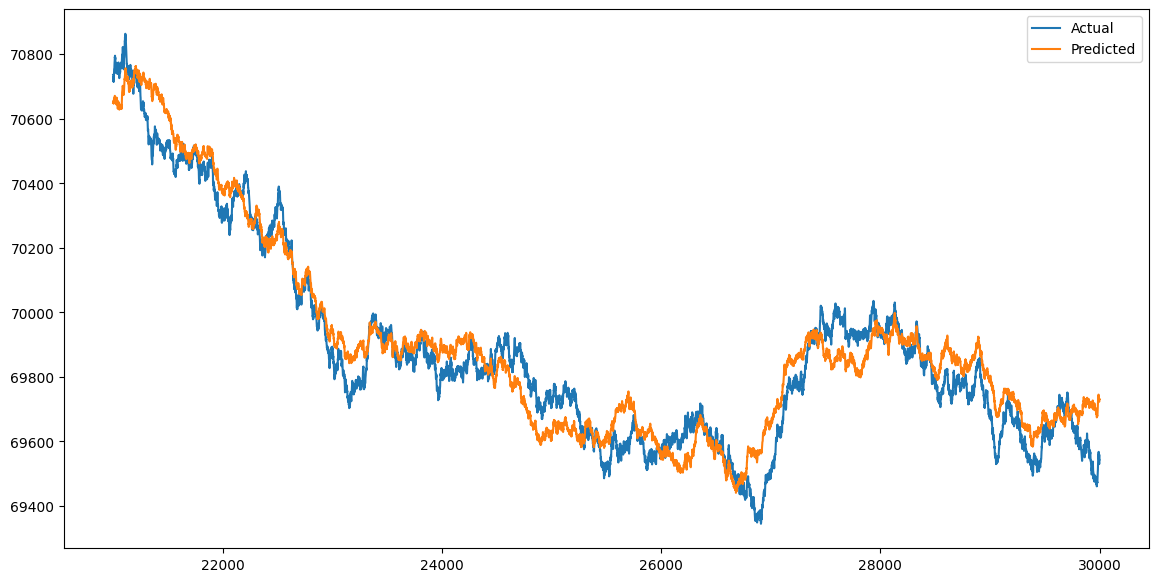

In [4]:
# Build Multivariate Linear Regression Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV


X = df_combined[['choc', 'straw', 'roses']]
y = df_combined['basket']

X_train, X_test, y_train, y_test = X[:int(len(X)*0.7)], X[int(len(X)*0.7):], y[:int(len(y)*0.7)], y[int(len(y)*0.7):]

# Train the model
model = ElasticNetCV(cv=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = pd.Series(model.predict(X_test))
y_pred.index = y_test.index

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


# Plot graph of predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


<Axes: >

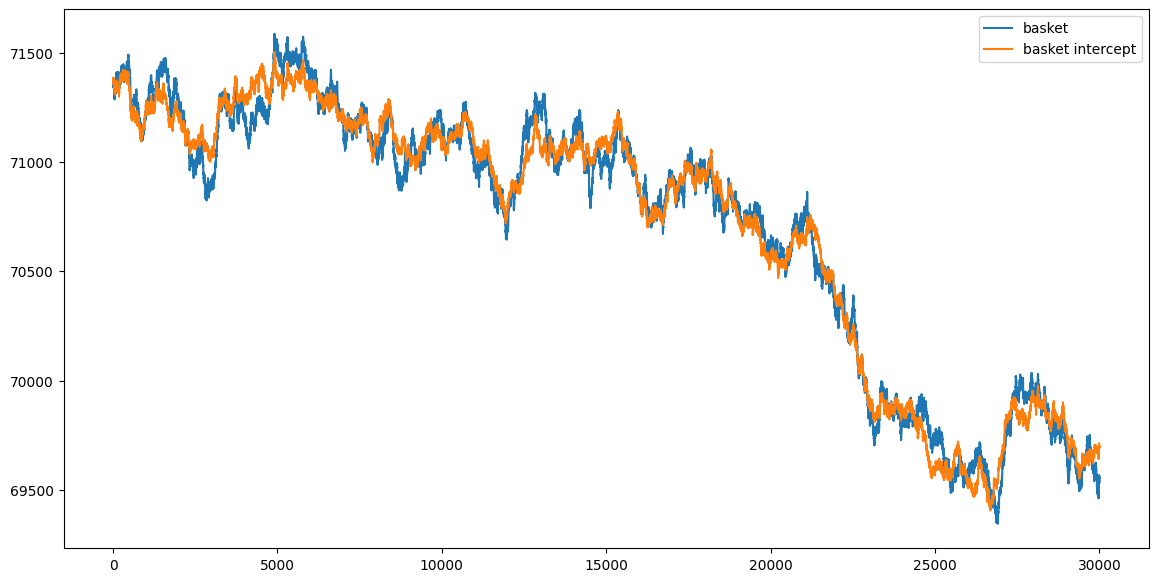

In [12]:
# Intercept = 1521
df_combined['basket intercept'] = df_combined['choc'] + df_combined['straw'] + df_combined['roses'] + 379
df_combined[['basket', 'basket intercept']].plot(figsize=(14, 7))



Mean Squared Error: 9012.662424651768
Coefficients: [0.94969798]
Intercept: 3506.1063398263213


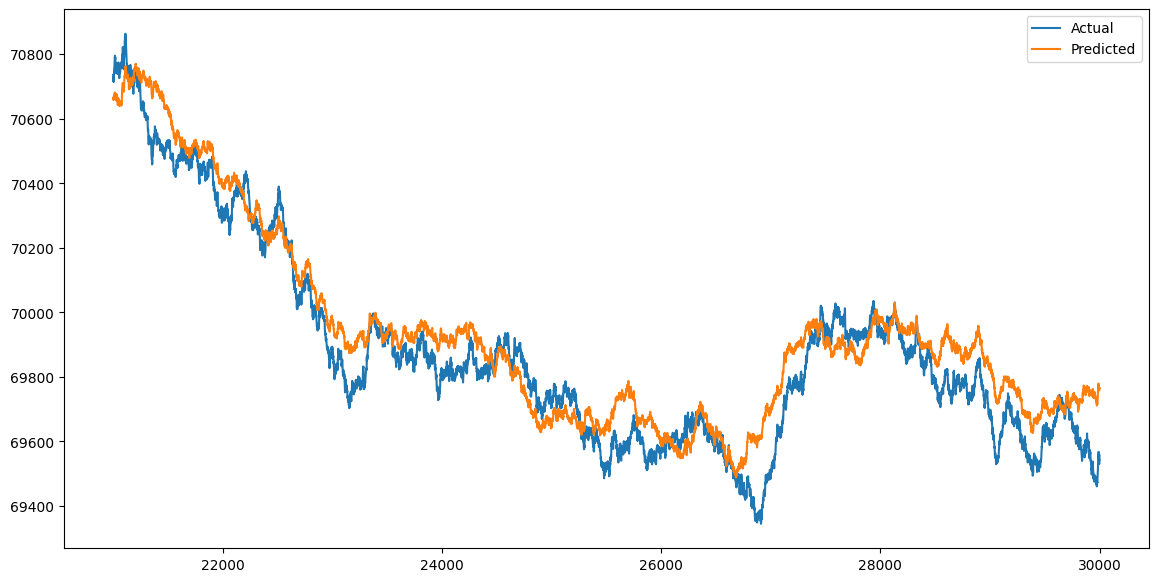

In [6]:
X = df_combined[['basket intercept']]
y = df_combined['basket']

X_train, X_test, y_train, y_test = X[:int(len(X)*0.7)], X[int(len(X)*0.7):], y[:int(len(y)*0.7)], y[int(len(y)*0.7):]

# Train the model
model = ElasticNetCV(cv=5, l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99]).set_params(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions
y_pred = pd.Series(model.predict(X_test))
y_pred.index = y_test.index

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


# Plot graph of predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

379.4904833333333

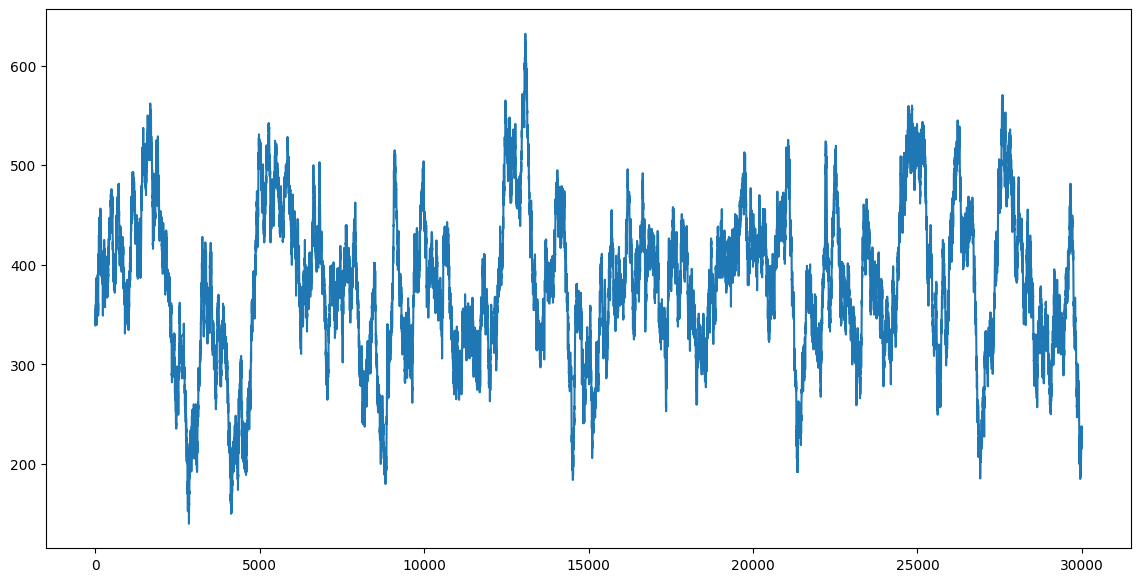

In [10]:
intercept = df_combined['basket'] - (df_combined['choc'] + df_combined['straw'] + df_combined['roses'])
intercept.plot(figsize=(14, 7))

intercept.mean()


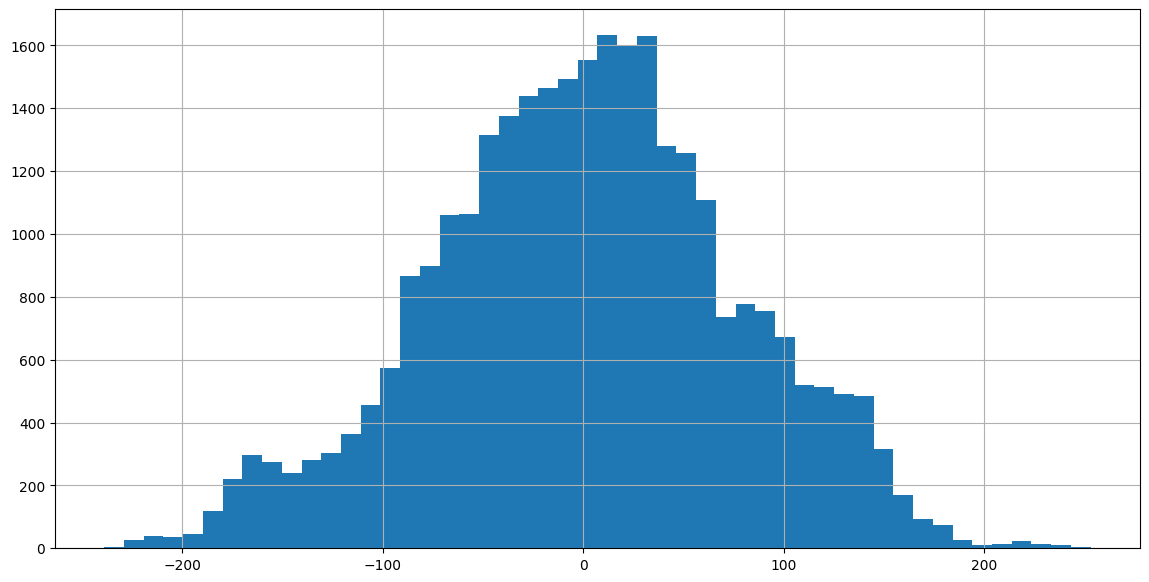

Mean: 0.4904833333333333
Standard Deviation: 76.42438217375009


In [14]:
# Plot graph of histogram of differences
plt.figure(figsize=(14, 7))
residuals = df_combined['basket'] - df_combined['basket intercept']
residuals.hist(bins=50)
plt.show()


# Get statistics out of the residuals, mean, standard deviation
print("Mean:", residuals.mean())
print("Standard Deviation:", residuals.std())

In [21]:
choc['SMA5'] = choc['choc'].rolling(window=5).mean()
choc.dropna(inplace=True)


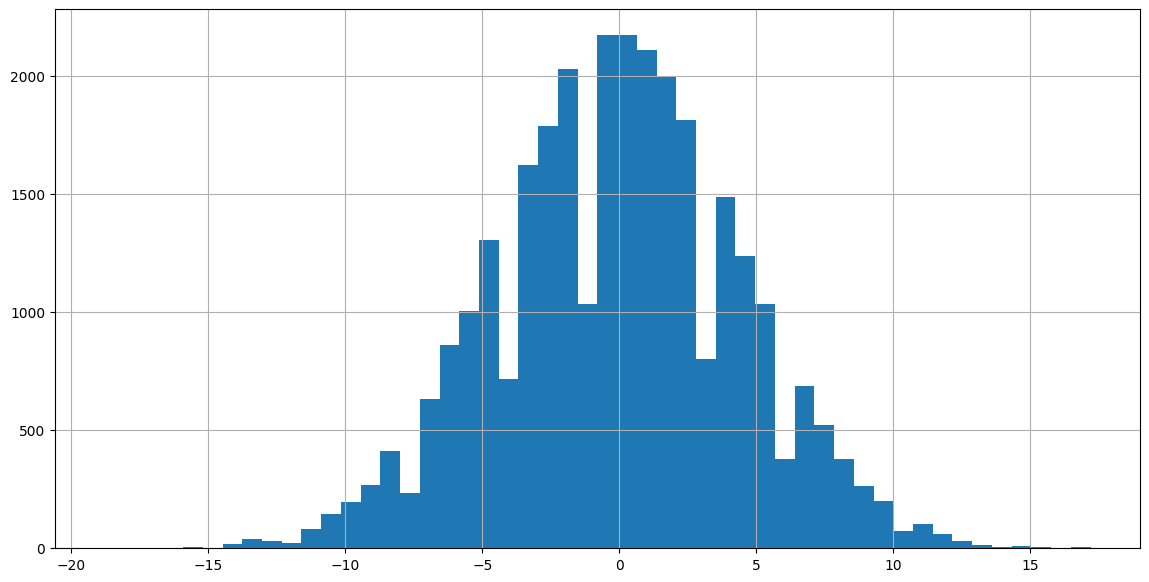

Mean: -0.06706227497000178
Standard Deviation: 4.4335425227244505


In [28]:
choc.reset_index(drop=True, inplace=True)
choc['Diff'] = choc['choc'] - choc['SMA5']

# Plot histogram of differences
plt.figure(figsize=(14, 7))
choc['Diff'].hist(bins=50)
plt.show()

# print statistics
print("Mean:", choc['Diff'].mean())
print("Standard Deviation:", choc['Diff'].std())